In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
df = pd.read_csv('Healthcare-Diabetes.csv')

In [23]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None
                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000  

In [25]:
## Dropping column 'Id' since it is not relevant
df = df.drop('Id', axis = 1)

# Define columns where 0 is invalid
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [27]:
for col in invalid_zero_cols:
    non_zero_values = df[col][df[col] != 0]
    median_value = non_zero_values.median()
    print(f"Median value for {col}: {median_value}")

    df.loc[df[col] == 0, col] = median_value

df.to_csv("Healthcare-diabetes-Modified.csv", index = False)

Median value for Glucose: 117.0
Median value for BloodPressure: 72.0
Median value for SkinThickness: 29.0
Median value for Insulin: 126.0
Median value for BMI: 32.4


In [29]:
df2 = pd.read_csv("Healthcare-diabetes-Modified.csv")

In [31]:
print("Cleaned dataset shape:", df2.shape)

Cleaned dataset shape: (2768, 9)


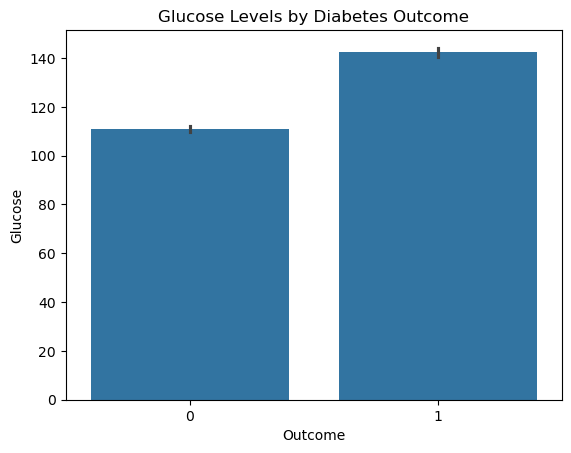

In [59]:
sns.barplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

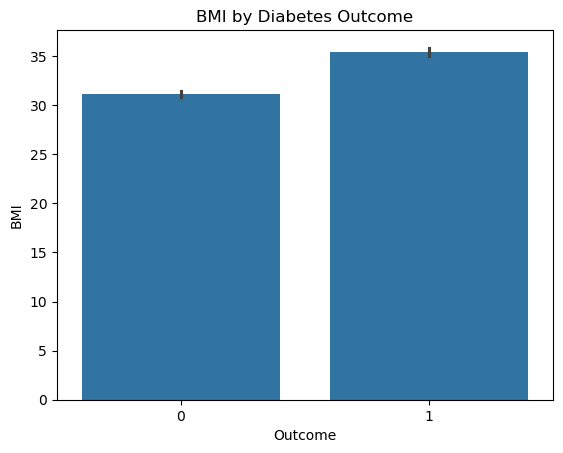

In [61]:
sns.barplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Diabetes Outcome')
plt.show()

/var/folders/ks/c91mfvj90z74bmm_n67dr46m0000gn/T/ipykernel_27344/2510966945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby(['AgeGroup', 'Outcome']).size().unstack()


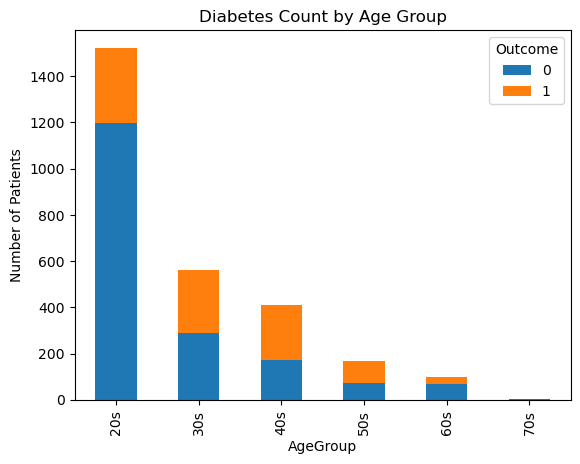

In [63]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80], labels=['20s','30s','40s','50s','60s','70s'])
age_grouped = df.groupby(['AgeGroup', 'Outcome']).size().unstack()
age_grouped.plot(kind='bar', stacked=True)
plt.title('Diabetes Count by Age Group')
plt.ylabel('Number of Patients')
plt.show()


Variance Inflation Factor (VIF):
                    Feature        VIF
0                   Glucose  21.403499
1                       BMI  30.765451
2                       Age  14.169213
3  DiabetesPedigreeFunction   3.193243
4                   Insulin   4.789264
5             SkinThickness  16.246216
6             BloodPressure  30.660879
7               Pregnancies   3.202839

Note: VIF > 5 indicates potential multicollinearity; VIF > 10 indicates high multicollinearity.
Glucose - Correlation: 0.489, P-value: 1.966e-166
BMI - Correlation: 0.290, P-value: 7.496e-55
Age - Correlation: 0.237, P-value: 1.168e-36
DiabetesPedigreeFunction - Correlation: 0.161, P-value: 1.827e-17
Insulin - Correlation: 0.199, P-value: 3.215e-26
SkinThickness - Correlation: 0.207, P-value: 2.936e-28
BloodPressure - Correlation: 0.172, P-value: 8.820e-20
Pregnancies - Correlation: 0.224, P-value: 9.257e-33

Logistic Regression Performance:
Accuracy: 0.758
Precision: 0.631
Recall: 0.684
F1 Score: 0.656


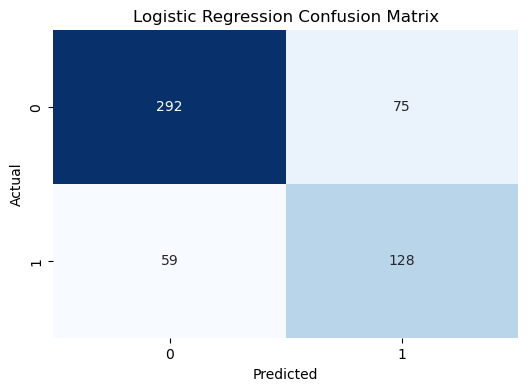

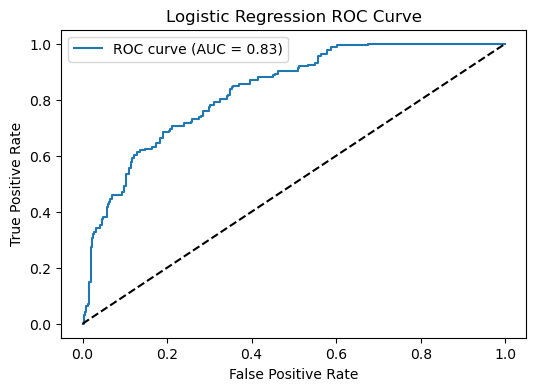


Decision Tree Performance:
Accuracy: 0.838
Precision: 0.726
Recall: 0.834
F1 Score: 0.776


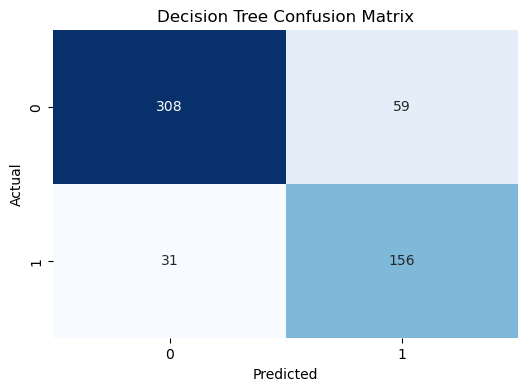

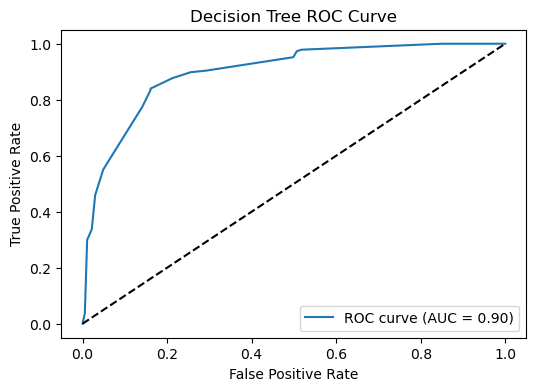

In [ ]:
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']
X = df[features]
y = df['Outcome']

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)
print("\nNote: VIF > 5 indicates potential multicollinearity; VIF > 10 indicates high multicollinearity.")


from scipy.stats import pearsonr

metrics = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies']
for metric in metrics:
    corr, p = pearsonr(df[metric], df['Outcome'])
    print(f"{metric} - Correlation: {corr:.3f}, P-value: {p:.3e}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    plt.close()

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.show()
    plt.close()

logistic = LogisticRegression(class_weight='balanced', random_state=42)
evaluate_model(logistic, "Logistic Regression", X_train_scaled, X_test_scaled, y_train, y_test)

decisiontree = DecisionTreeClassifier(random_state = 42, max_depth=5)
evaluate_model(decisiontree, "Decision Tree", X_train, X_test, y_train, y_test)


Variance Inflation Factor (VIF):
   Feature        VIF
0  Glucose  16.179295
1      BMI  13.518929
2      Age   8.504774

Note: VIF > 5 indicates potential multicollinearity; VIF > 10 indicates high multicollinearity.
Glucose - Correlation: 0.489, P-value: 1.966e-166
BMI - Correlation: 0.290, P-value: 7.496e-55
Age - Correlation: 0.237, P-value: 1.168e-36

Logistic Regression Performance:
Accuracy: 0.760
Precision: 0.630
Recall: 0.701
F1 Score: 0.663


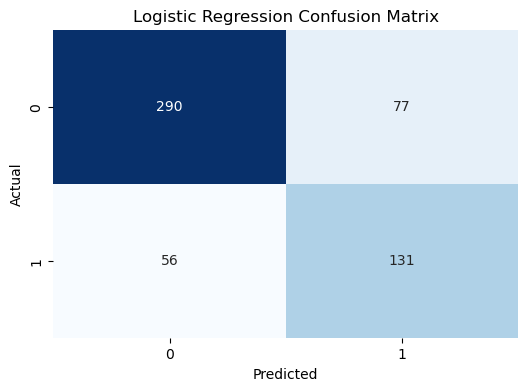

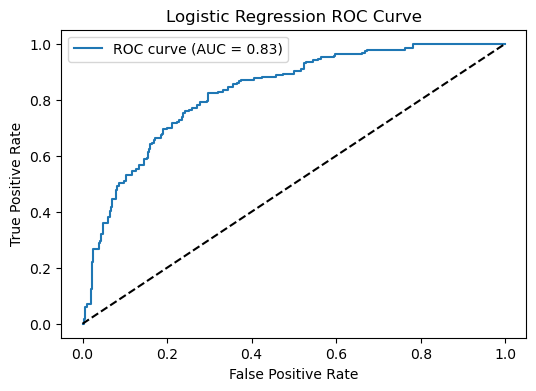


Decision Tree Performance:
Accuracy: 0.798
Precision: 0.687
Recall: 0.738
F1 Score: 0.711


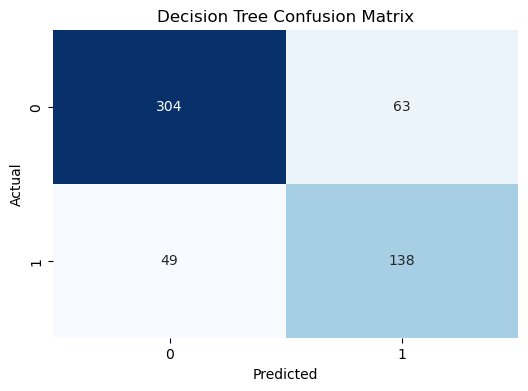

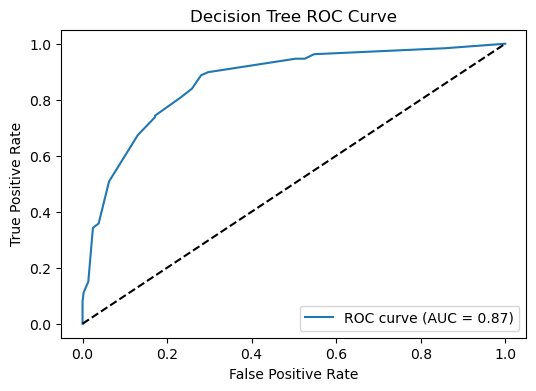

In [ ]:
features = ['Glucose', 'BMI', 'Age']
X = df[features]
y = df['Outcome']

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)
print("\nNote: VIF > 5 indicates potential multicollinearity; VIF > 10 indicates high multicollinearity.")


from scipy.stats import pearsonr

metrics = ['Glucose', 'BMI', 'Age']
for metric in metrics:
    corr, p = pearsonr(df[metric], df['Outcome'])
    print(f"{metric} - Correlation: {corr:.3f}, P-value: {p:.3e}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    plt.close()

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.show()
    plt.close()

logistic = LogisticRegression(class_weight='balanced', random_state=42)
evaluate_model(logistic, "Logistic Regression", X_train_scaled, X_test_scaled, y_train, y_test)

decisiontree = DecisionTreeClassifier(random_state = 42, max_depth=5)
evaluate_model(decisiontree, "Decision Tree", X_train, X_test, y_train, y_test)